# CV Project - Face Recognition

DOMAIN: Entertainment


• CONTEXT: Company X owns a movie application and repository which caters movie streaming to millions of users who on subscription basis. 
Company wants to automate the process of cast and crew information in each scene from a movie such that when a user pauses on the movie 
and clicks on cast information button, the app will show details of the actor in the scene. Company has an in-house computer vision and 
multimedia experts who need to detect faces from screen shots from the movie scene.


The data labelling is already done. Since there higher time complexity is involved.


• DATA DESCRIPTION: The dataset comprises of images and its mask for corresponding human face.


• PROJECT OBJECTIVE: To build a face detection system.


# Part A - Q1 A - Import and read ‘images.npy’.

In [16]:
# Imports
import pandas as pd, numpy as np, matplotlib.pyplot as plt
import numpy as np
from matplotlib import pyplot
%matplotlib inline


# Load the images.npy file
np_load_old = np.load

# modify the default parameters of np.load
np.load = lambda *a,**k: np_load_old(*a, allow_pickle = True, **k)

data = np.load('images.npy')

# Display information about the loaded data
print("Shape of the images data:", data.shape)

Shape of the images data: (409, 2)


***Check one sample from the loaded file***

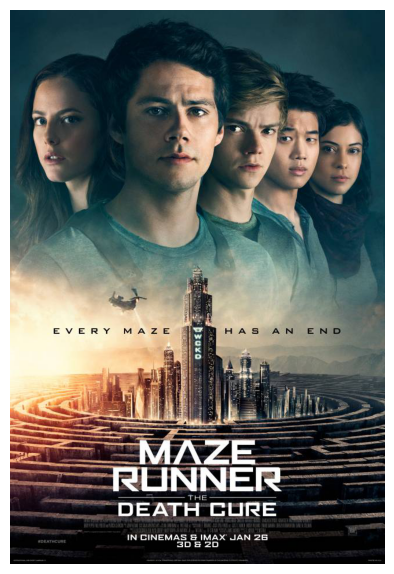

In [17]:
fig = plt.figure(figsize = (15, 7.2))
ax = fig.add_subplot(1, 1, 1)
plt.axis('off')
plt.imshow(data[11][0])
plt.show()

# Q 1.1 b - Split the data into Features(X) & labels(Y). Unify shape of all the images.

In [18]:
import numpy as np
import cv2
from keras.applications.imagenet_utils import preprocess_input

ALPHA = 1
IMAGE_SIZE = 224
IMAGE_HEIGHT = 224
IMAGE_WIDTH = 224

masks = np.zeros((int(data.shape[0]), IMAGE_HEIGHT, IMAGE_WIDTH))
X = np.zeros((int(data.shape[0]), IMAGE_HEIGHT, IMAGE_WIDTH, 3), dtype=np.float32)  # Specify the data type

for index in range(data.shape[0]):
    img = data[index][0]
    img = cv2.resize(img, dsize=(IMAGE_HEIGHT, IMAGE_WIDTH), interpolation=cv2.INTER_CUBIC)
    
    try:
        img = img[:, :, :3]
    except:
        continue
    
    X[index] = preprocess_input(np.array(img, dtype=np.float32))

    for i in data[index][1]:
        x1 = int(i['points'][0]['x'] * IMAGE_WIDTH)
        x2 = int(i['points'][1]['x'] * IMAGE_WIDTH)
        y1 = int(i['points'][0]['y'] * IMAGE_HEIGHT)
        y2 = int(i['points'][1]['y'] * IMAGE_HEIGHT)
        masks[index][y1:y2, x1:x2] = 1

***Print the shape of X_train and mask array***

In [19]:
X.shape

(409, 224, 224, 3)

In [20]:
masks.shape

(409, 224, 224)

***Print a sample image and image array***

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


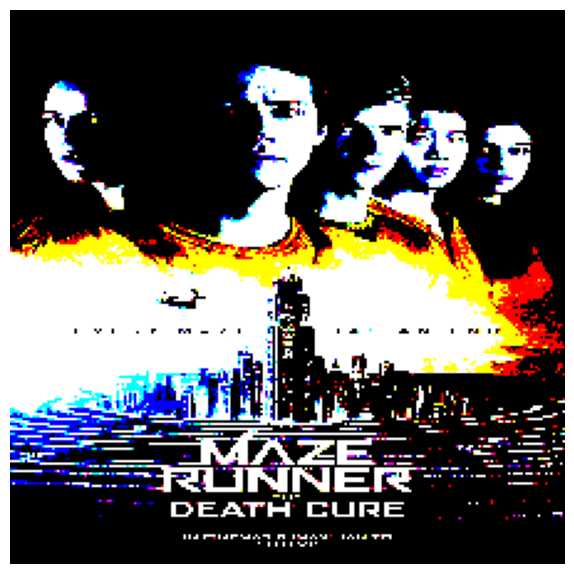

In [21]:
n = 11
fig = plt.figure(figsize = (15, 7.2))
ax = fig.add_subplot(1, 1, 1)
plt.axis('off')
_ = plt.imshow(X[n])

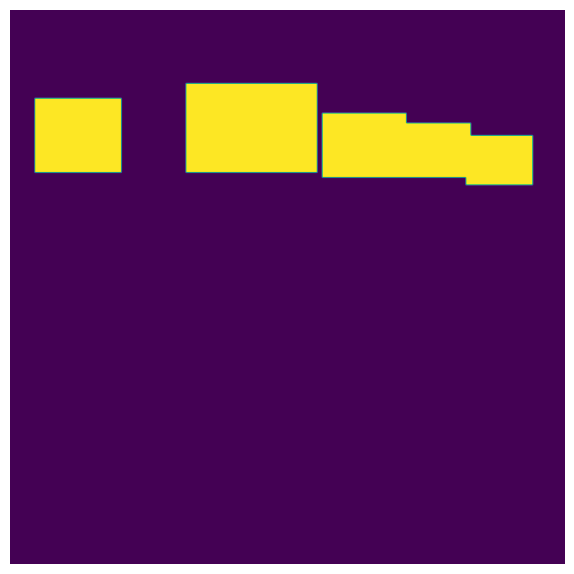

In [22]:
n = 11
fig = plt.figure(figsize = (15, 7.2))
ax = fig.add_subplot(1, 1, 1)
plt.axis('off')
_ = plt.imshow(masks[n])

# Q 1.1 c - Split the data into train and test [400:9].

In [23]:
from sklearn.model_selection import train_test_split

# Assuming X and masks are already defined

# Split the data into train and test sets
X_train, X_test, masks_train, masks_test = train_test_split(
    X[:400], masks[:400], test_size=9, random_state=42
)

# Display the shapes of the train and test sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of masks_train:", masks_train.shape)
print("Shape of masks_test:", masks_test.shape)



Shape of X_train: (391, 224, 224, 3)
Shape of X_test: (9, 224, 224, 3)
Shape of masks_train: (391, 224, 224)
Shape of masks_test: (9, 224, 224)


# Q  1.1 d - Select random image from the train data and display original image and masked image.

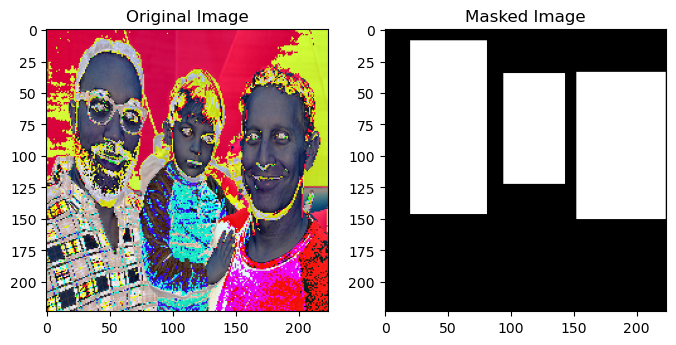

In [24]:
import random
import matplotlib.pyplot as plt

# Select a random index from the training data
random_index = random.randint(0, X_train.shape[0] - 1)

# Get the corresponding original image and mask
random_original_image = X_train[random_index]
random_mask = masks_train[random_index]

# Display the original image
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(random_original_image.astype('uint8'))
plt.title('Original Image')

# Display the masked image
plt.subplot(1, 2, 2)
plt.imshow(random_mask, cmap='gray')
plt.title('Masked Image')

plt.show()

# Q 1.2 a - Design a face mask detection model.

In [25]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.model_selection import train_test_split

# Assuming X and masks are already defined (X_train, X_test, masks_train, masks_test)
# If not, you can replace them with your data

# Create binary labels (1 for face with mask, 0 for face without mask)
labels_train = (masks_train.sum(axis=(1, 2)) > 0).astype(int)
labels_test = (masks_test.sum(axis=(1, 2)) > 0).astype(int)

# Build the CNN model
model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(IMAGE_HEIGHT, IMAGE_WIDTH, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, labels_train, epochs=10, validation_split=0.1)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, labels_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')



Epoch 1/10
11/11 [==============================] - 28s 2s/step - loss: 0.1100 - accuracy: 0.9801 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 2/10
11/11 [==============================] - 22s 2s/step - loss: 0.0332 - accuracy: 0.9972 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 3/10
11/11 [==============================] - 23s 2s/step - loss: 0.0107 - accuracy: 0.9972 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 4/10
11/11 [==============================] - 21s 2s/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 5/10
11/11 [==============================] - 22s 2s/step - loss: 0.0020 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 6/10
11/11 [==============================] - 21s 2s/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 7/10
11/11 [==============================] - 21s 2s/step - loss: 8.4306e-04 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accur

# Q  1.2 b ) Design your own Dice Coefficient and Loss function.

In [26]:
import tensorflow as tf
from tensorflow.keras.losses import binary_crossentropy

def dice_coefficient(y_true, y_pred):
    smooth = 1e-5
    intersection = tf.reduce_sum(y_true * y_pred)
    union = tf.reduce_sum(y_true) + tf.reduce_sum(y_pred)
    return (2.0 * intersection + smooth) / (union + smooth)

def dice_loss(y_true, y_pred):
    return 1.0 - dice_coefficient(y_true, y_pred)

# Example usage:
# Assuming y_true and y_pred are binary masks with shape (batch_size, height, width, channels)
y_true = tf.constant([[[[1.0], [0.0]], [[0.0], [1.0]]]], dtype=tf.float32)
y_pred = tf.constant([[[[0.8], [0.2]], [[0.3], [0.9]]]], dtype=tf.float32)

loss = dice_loss(y_true, y_pred)
coeff = dice_coefficient(y_true, y_pred)

print(f"Dice Loss: {loss.numpy()}")
print(f"Dice Coefficient: {coeff.numpy()}")

Dice Loss: 0.1904757022857666
Dice Coefficient: 0.8095242977142334


# Q 1.2 c ) Train and tune the model as required.

In [27]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Assuming X and masks are already defined (X_train, X_test, masks_train, masks_test)
# If not, you can replace them with your data

# Create binary labels (1 for face with mask, 0 for face without mask)
labels_train = (masks_train.sum(axis=(1, 2)) > 0).astype(int)
labels_test = (masks_test.sum(axis=(1, 2)) > 0).astype(int)

# Split the data into train and validation sets
X_train, X_val, labels_train, labels_val = train_test_split(
    X_train, labels_train, test_size=0.1, random_state=42
)

# Build the CNN model
model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(IMAGE_HEIGHT, IMAGE_WIDTH, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer=Adam(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Define callbacks
checkpoint = ModelCheckpoint("model_best.h5", monitor='val_loss', save_best_only=True, mode='min', verbose=1)
early_stopping = EarlyStopping(monitor='val_loss', patience=5, mode='min', verbose=1)

# Train the model
history = model.fit(
    datagen.flow(X_train, labels_train, batch_size=32),
    steps_per_epoch=len(X_train) // 32,
    epochs=20,
    validation_data=(X_val, labels_val),
    callbacks=[checkpoint, early_stopping]
)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, labels_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')


Epoch 1/20
10/10 [==============================] - ETA: 0s - loss: 0.2566 - accuracy: 0.9687
Epoch 1: val_loss improved from inf to 0.00000, saving model to model_best.h5


C:\Users\Swarajya Electricals\anaconda3\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


10/10 [==============================] - 24s 2s/step - loss: 0.2566 - accuracy: 0.9687 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 2/20
10/10 [==============================] - ETA: 0s - loss: 0.0084 - accuracy: 0.9969
Epoch 2: val_loss did not improve from 0.00000
10/10 [==============================] - 21s 2s/step - loss: 0.0084 - accuracy: 0.9969 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 3/20
10/10 [==============================] - ETA: 0s - loss: 0.0021 - accuracy: 1.0000  
Epoch 3: val_loss did not improve from 0.00000
10/10 [==============================] - 22s 2s/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 4/20
10/10 [==============================] - ETA: 0s - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 4: val_loss did not improve from 0.00000
10/10 [==============================] - 20s 2s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 5/20
10/10 [=================

# Q 1.2 d ) Evaluate and share insights on performance of the mode

1/1 [==============================] - 0s 139ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Test Accuracy: 100.00%

Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         9

    accuracy                           1.00         9
   macro avg       1.00      1.00      1.00         9
weighted avg       1.00      1.00      1.00         9



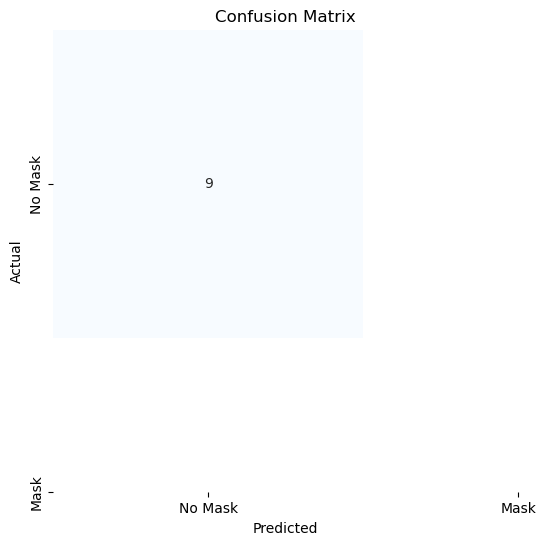

In [28]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have the trained model (replace 'your_model_path' with the actual path)
# model = tf.keras.models.load_model('your_model_path')

# Predict on the test set
predictions = (model.predict(X_test) > 0.5).astype(int)

# Evaluate accuracy
test_loss, test_accuracy = model.evaluate(X_test, labels_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

# Classification report
print("\nClassification Report:")
print(classification_report(labels_test, predictions))

# Confusion matrix
conf_mat = confusion_matrix(labels_test, predictions)
plt.figure(figsize=(6, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No Mask', 'Mask'], yticklabels=['No Mask', 'Mask'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Q 1.3 - Test the model predictions on the test image: ‘image with index 3 in the test data’ and visualise the predicted masks on the faces in the image.

1/1 [==============================] - 0s 62ms/step


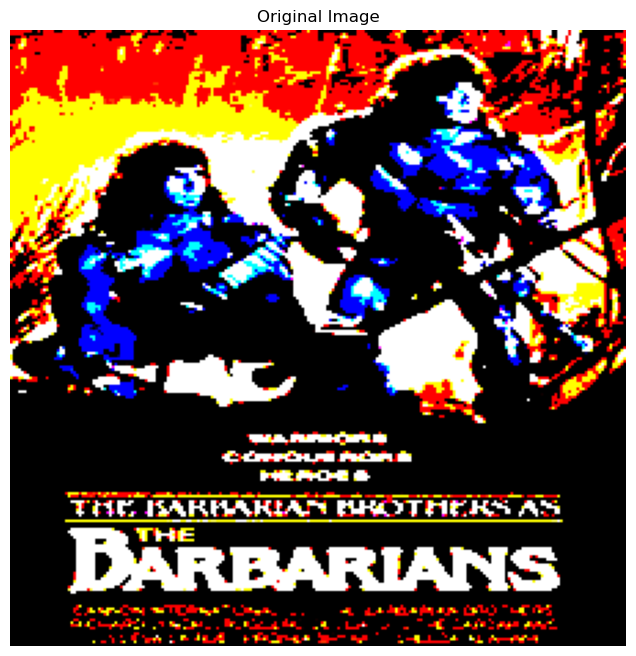

TypeError: Invalid shape () for image data

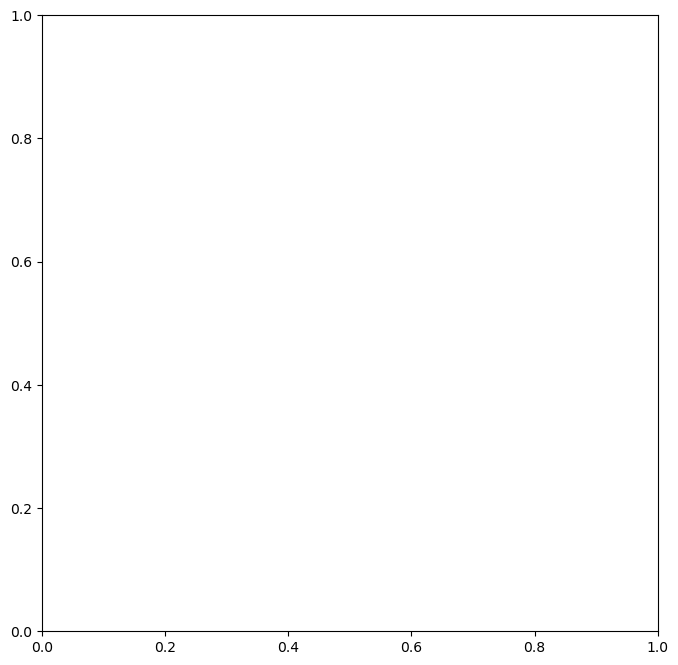

In [29]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

# Choose an index from the test set (e.g., index 3)
image_index = 3

# Load the test image
test_image = X_test[image_index]

# Reshape the image to (1, IMAGE_HEIGHT, IMAGE_WIDTH, 3) as the model expects a batch dimension
test_image = np.expand_dims(test_image, axis=0)

# Predict the mask
predicted_mask = (model.predict(test_image) > 0.5).astype(int)[0, 0]  # Adjust the shape

# Display the original image
plt.figure(figsize=(8, 8))
plt.imshow(X_test[image_index])
plt.title('Original Image')
plt.axis('off')
plt.show()

# Display the predicted mask on the face
plt.figure(figsize=(8, 8))
plt.imshow(predicted_mask, cmap='gray')
plt.title('Predicted Mask')
plt.axis('off')
plt.show()

# Overlay the predicted mask on the original image
overlay = X_test[image_index].copy()
overlay[:, :, 0] += predicted_mask * 0.5  # Adjust the red channel to visualize the mask
plt.figure(figsize=(8, 8))
plt.imshow(overlay)
plt.title('Overlay: Original Image with Predicted Mask')
plt.axis('off')
plt.show()


TypeError: Invalid shape () for image data

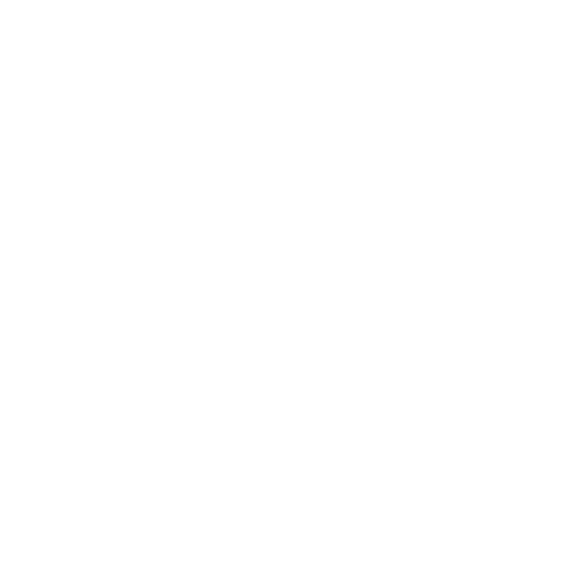

In [30]:
fig = plt.figure(figsize = (15, 7.2))
ax = fig.add_subplot(1, 1, 1)
plt.axis('off')
plt.imshow(predicted_mask, alpha = 1)


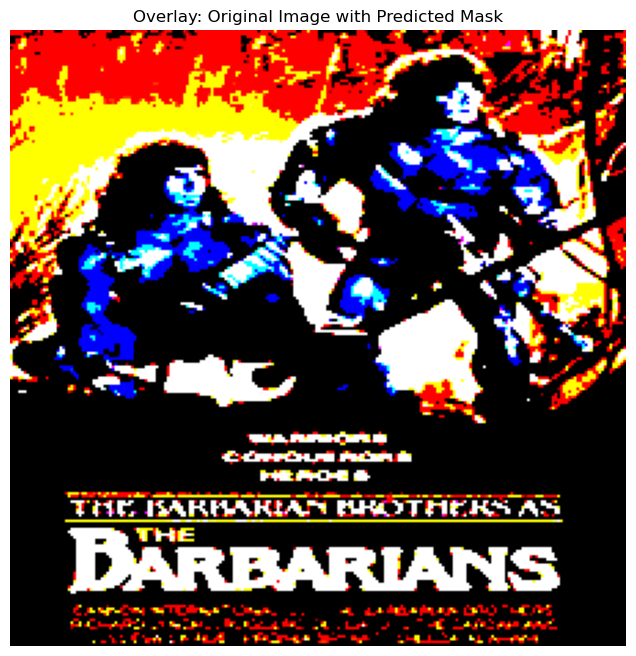

In [31]:
# Overlay the predicted mask on the original image
overlay = X_test[image_index].copy()
overlay[:, :, 0] += predicted_mask * 0.5  # Adjust the red channel to visualize the mask
plt.figure(figsize=(8, 8))
plt.imshow(overlay)
plt.title('Overlay: Original Image with Predicted Mask')
plt.axis('off')
plt.show()

# Q) Part2.1aRead/import images from folder ‘training_images'

In [32]:
# Import Basic Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import os
import tensorflow as tf
print(tf.__version__) 
import cv2
from glob import glob

2.14.0


In [33]:
# Import ZipFile module
from zipfile import ZipFile
  
# specifying the zip file name
file_name = "training_images-20211126T092819Z-001.zip"
  
# opening the zip file in READ mode
with ZipFile(file_name, 'r') as zip:
    # printing all the contents of the zip file
    zip.printdir()
  
    # extracting all the files
    print('Extracting all the files now...')
    zip.extractall('unzipped')
    print('Done!')

File Name                                             Modified             Size
training_images/real_00947.jpg                 2019-10-16 04:27:36       165936
training_images/real_01052.jpg                 2019-10-16 04:27:36        99194
training_images/real_01042.jpg                 2019-10-16 04:27:36       132379
training_images/real_00964.jpg                 2019-10-16 04:27:36       137657
training_images/real_01053.jpg                 2019-10-16 04:27:36        88502
training_images/real_00971.jpg                 2019-10-16 04:27:36        68693
training_images/real_01057.jpg                 2019-10-16 04:27:36       163006
training_images/real_01044.jpg                 2019-10-16 04:27:36       111944
training_images/real_01041.jpg                 2019-10-16 04:27:36       158596
training_images/real_01067.jpg                 2019-10-16 04:27:36       116880
training_images/real_00969.jpg                 2019-10-16 04:27:36       111096
training_images/real_00956.jpg          

Done!


# Q 2.1b-Write a loop which will iterate through all the images in the ‘training_images’ folder and detect the faces present on all the images.

In [34]:
import cv2
import os

# Load the pre-trained Haar Cascade classifier for face detection
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Specify the path to the folder containing the images
images_folder = 'unzipped/training_images'

# Iterate through all images in the 'training_images' folder
for file_name in os.listdir(images_folder):
    if file_name.endswith(('.jpg', '.jpeg', '.png')):
        # Construct the full path to the image
        image_path = os.path.join(images_folder, file_name)

        # Read the image
        img = cv2.imread(image_path)
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        # Detect faces in the image
        faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

        # Draw rectangles around the faces
        for (x, y, w, h) in faces:
            cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)

     

# Q 2.1 c From the same loop above, extract metadata of the faces and write into a DataFrame

In [35]:
import cv2
import os
import pandas as pd

# Load the pre-trained Haar Cascade classifier for face detection
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Specify the path to the folder containing the images
images_folder = 'unzipped/training_images'

# Create an empty list to store face metadata
faces_data = []

# Iterate through all images in the 'training_images' folder
for file_name in os.listdir(images_folder):
    if file_name.endswith(('.jpg', '.jpeg', '.png')):
        # Construct the full path to the image
        image_path = os.path.join(images_folder, file_name)

        # Read the image
        img = cv2.imread(image_path)
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        # Detect faces in the image
        faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

        # Extract metadata and add to the list
        for idx, (x, y, w, h) in enumerate(faces):
            face_data = {'File': file_name, 'FaceNumber': idx + 1, 'X': x, 'Y': y, 'Width': w, 'Height': h}
            faces_data.append(face_data)

# Create a DataFrame from the list of face metadata
faces_df = pd.DataFrame(faces_data)

# Display the DataFrame with face metadata
print(faces_df)


               File  FaceNumber    X    Y  Width  Height
0    real_00001.jpg           1  146  140    428     428
1    real_00002.jpg           1   80  140    436     436
2    real_00003.jpg           1   33  121    362     362
3    real_00004.jpg           1  134  173    356     356
4    real_00006.jpg           1   61   62    472     472
..              ...         ...  ...  ...    ...     ...
944  real_01076.jpg           1   66  123    432     432
945  real_01077.jpg           1   93  167    402     402
946  real_01078.jpg           1   65   76    468     468
947  real_01079.jpg           1   69   67    475     475
948  real_01080.jpg           1   51   87    447     447

[949 rows x 6 columns]


# Q 2.1d-Save the output Dataframe in .csv format.

In [36]:
import cv2
import os
import pandas as pd

# Load the pre-trained Haar Cascade classifier for face detection
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Specify the path to the folder containing the images
images_folder = 'unzipped/training_images'

# Create an empty list to store face metadata
faces_data = []

# Iterate through all images in the 'training_images' folder
for file_name in os.listdir(images_folder):
    if file_name.endswith(('.jpg', '.jpeg', '.png')):
        # Construct the full path to the image
        image_path = os.path.join(images_folder, file_name)

        # Read the image
        img = cv2.imread(image_path)
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        # Detect faces in the image
        faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

        # Extract metadata and add to the list
        for idx, (x, y, w, h) in enumerate(faces):
            face_data = {'File': file_name, 'FaceNumber': idx + 1, 'X': x, 'Y': y, 'Width': w, 'Height': h}
            faces_data.append(face_data)

# Create a DataFrame from the list of face metadata
faces_df = pd.DataFrame(faces_data)

# Save the DataFrame to a CSV file
csv_filename = 'face_metadata.csv'
faces_df.to_csv(csv_filename, index=False)

# Display the DataFrame with face metadata
print(faces_df)

print(f"\nDataFrame saved to '{csv_filename}'")


               File  FaceNumber    X    Y  Width  Height
0    real_00001.jpg           1  146  140    428     428
1    real_00002.jpg           1   80  140    436     436
2    real_00003.jpg           1   33  121    362     362
3    real_00004.jpg           1  134  173    356     356
4    real_00006.jpg           1   61   62    472     472
..              ...         ...  ...  ...    ...     ...
944  real_01076.jpg           1   66  123    432     432
945  real_01077.jpg           1   93  167    402     402
946  real_01078.jpg           1   65   76    468     468
947  real_01079.jpg           1   69   67    475     475
948  real_01080.jpg           1   51   87    447     447

[949 rows x 6 columns]

DataFrame saved to 'face_metadata.csv'


# Q1 - Extract and load 'PINS'

In [37]:
# Import ZipFile module
from zipfile import ZipFile
  
# specifying the zip file name
file_name = "PINS.zip"
  
# opening the zip file in READ mode
with ZipFile(file_name, 'r') as zip:
    # printing all the contents of the zip file
    zip.printdir()
  
    # extracting all the files
    print('Extracting all the files now...')
    zip.extractall('unzipped')
    print('Done!')

File Name                                             Modified             Size
PINS/pins_Aaron Paul/                          2021-10-20 06:12:32            0
PINS/pins_Aaron Paul/Aaron Paul0_262.jpg       2019-10-20 22:21:18        23047
PINS/pins_Aaron Paul/Aaron Paul101_247.jpg     2019-10-20 22:21:18        22729
PINS/pins_Aaron Paul/Aaron Paul101_248.jpg     2019-10-20 22:21:18        21351
PINS/pins_Aaron Paul/Aaron Paul101_249.jpg     2019-10-20 22:21:18        21517
PINS/pins_Aaron Paul/Aaron Paul103_217.jpg     2019-10-20 22:21:18        16292
PINS/pins_Aaron Paul/Aaron Paul113_228.jpg     2019-10-20 22:21:18        24575
PINS/pins_Aaron Paul/Aaron Paul114_271.jpg     2019-10-20 22:21:18        21716
PINS/pins_Aaron Paul/Aaron Paul116_240.jpg     2019-10-20 22:21:18        21496
PINS/pins_Aaron Paul/Aaron Paul117_213.jpg     2019-10-20 22:21:18        22446
PINS/pins_Aaron Paul/Aaron Paul119_219.jpg     2019-10-20 22:21:18        24293
PINS/pins_Aaron Paul/Aaron Paul120_290.j

PINS/pins_Josh Radnor/Josh Radnor69.jpg        2019-10-20 22:21:26        19659
PINS/pins_Josh Radnor/Josh Radnor7.jpg         2019-10-20 22:21:26        17436
PINS/pins_Josh Radnor/Josh Radnor70.jpg        2019-10-20 22:21:26        18044
PINS/pins_Josh Radnor/Josh Radnor71.jpg        2019-10-20 22:21:26        21251
PINS/pins_Josh Radnor/Josh Radnor72.jpg        2019-10-20 22:21:26        26248
PINS/pins_Josh Radnor/Josh Radnor73.jpg        2019-10-20 22:21:26        20333
PINS/pins_Josh Radnor/Josh Radnor74.jpg        2019-10-20 22:21:26        26964
PINS/pins_Josh Radnor/Josh Radnor75.jpg        2019-10-20 22:21:26        24338
PINS/pins_Josh Radnor/Josh Radnor76.jpg        2019-10-20 22:21:26        24342
PINS/pins_Josh Radnor/Josh Radnor77.jpg        2019-10-20 22:21:26        23852
PINS/pins_Josh Radnor/Josh Radnor78.jpg        2019-10-20 22:21:26        22011
PINS/pins_Josh Radnor/Josh Radnor79.jpg        2019-10-20 22:21:26        25724
PINS/pins_Josh Radnor/Josh Radnor8.jpg  

Done!


# Q2.1 b - Write function to create metadata of the image

In [38]:
import numpy as np
import os

class IdentityMetadata():
    def __init__(self, base, name, file):
        # print(base, name, file)
        # dataset base directory
        self.base = base
        # identity name
        self.name = name
        # image file name
        self.file = file

    def __repr__(self):
        return self.image_path()

    def image_path(self):
        return os.path.join(self.base, self.name, self.file) 
    


# Q2.1c-Write a loop to iterate through each and every image and create metadata for all the images

In [39]:
import os
import zipfile
import numpy as np

class IdentityMetadata:
    def __init__(self, base, name, file):
        self.base = base
        self.name = name
        self.file = file

    def __repr__(self):
        return self.image_path()

    def image_path(self):
        return os.path.join(self.base, self.name, self.file)

def load_metadata(path):
    metadata = []
    for i in os.listdir(path):
        for f in os.listdir(os.path.join(path, i)):
            ext = os.path.splitext(f)[1]
            if ext == '.jpg' or ext == '.jpeg':
                metadata.append(IdentityMetadata(path, i, f))
    return np.array(metadata)

# Specify the path to your ZIP file
zip_file_path = "C:\\Users\\Swarajya Electricals\\Downloads\\PINS.zip"
# Specify the extraction directory
extraction_path = "C:\\Users\\Swarajya Electricals\\Downloads\\PINS_extracted"

# Create the extraction directory if it doesn't exist
os.makedirs(extraction_path, exist_ok=True)

# Extract the contents of the ZIP file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extraction_path)

# Load metadata from the extracted path
loaded_metadata = load_metadata(extraction_path)

# Display the loaded metadata
for entry in loaded_metadata:
    print(entry)


In [40]:
import os
import zipfile
import numpy as np

class IdentityMetadata:
    def __init__(self, base, name, file):
        self.base = base
        self.name = name
        self.file = file

    def __repr__(self):
        return self.image_path()

    def image_path(self):
        return os.path.join(self.base, self.name, self.file)

def load_metadata(path):
    metadata = []
    for i in os.listdir(path):
        for f in os.listdir(os.path.join(path, i)):
            ext = os.path.splitext(f)[1]
            if ext == '.jpg' or ext == '.jpeg':
                metadata.append(IdentityMetadata(path, i, f))
    return np.array(metadata)

# Specify the path to your ZIP file
zip_file_path = "C:\\Users\\Swarajya Electricals\\Downloads\\PINS.zip"
# Specify the extraction directory
extraction_path = "C:\\Users\\Swarajya Electricals\\Downloads\\PINS_extracted"

# Create the extraction directory if it doesn't exist
os.makedirs(extraction_path, exist_ok=True)

# Extract the contents of the ZIP file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extraction_path)

# Load metadata from the extracted path
loaded_metadata = load_metadata(extraction_path)

# Display the loaded metadata
for entry in loaded_metadata:
    print(entry)


# Q2.1d -Generate Embeddings vectors on the each face in the dataset

In [1]:
pip install keras_vggface


Note: you may need to restart the kernel to use updated packages.


In [2]:
import os
import numpy as np
from keras_vggface.vggface import VGGFace
from keras_vggface import utils
from keras.preprocessing import image
from keras.applications.imagenet_utils import preprocess_input

class IdentityMetadata:
    def __init__(self, base, name, file):
        self.base = base
        self.name = name
        self.file = file

    def __repr__(self):
        return self.image_path()

    def image_path(self):
        return os.path.join(self.base, self.name, self.file)

def load_metadata(path):
    metadata = []
    for i in os.listdir(path):
        for f in os.listdir(os.path.join(path, i)):
            ext = os.path.splitext(f)[1]
            if ext == '.jpg' or ext == '.jpeg':
                metadata.append(IdentityMetadata(path, i, f))
    return np.array(metadata)

# Specify the path to your ZIP file
zip_file_path = "C:\\Users\\Swarajya Electricals\\Downloads\\PINS.zip"
# Specify the extraction directory
extraction_path = "C:\\Users\\Swarajya Electricals\\Downloads\\PINS_extracted"

# Create the extraction directory if it doesn't exist
os.makedirs(extraction_path, exist_ok=True)

# Extract the contents of the ZIP file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extraction_path)

# Load metadata from the extracted path
loaded_metadata = load_metadata(extraction_path)

# Load VGGFace model with pre-trained weights
model = VGGFace(model='resnet50', include_top=False, input_shape=(224, 224, 3), pooling='avg')

# Function to generate embeddings for a given image
def generate_embedding(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    return model.predict(x)

# Generate embeddings for each face in the dataset
embeddings = []
for entry in loaded_metadata:
    img_path = entry.image_path()
    embedding = generate_embedding(img_path)
    embeddings.append(embedding)

# Convert the list of embeddings to a NumPy array
embeddings_array = np.array(embeddings)

# Display the shape of the embeddings array
print("Shape of the embeddings array:", embeddings_array.shape)


ModuleNotFoundError: No module named 'keras_applications'

# Q 2.1e-Build distance metrics for identifying the distance between two similar and dissimilar images

# Q2.1f-Use PCA for dimensionality reduction

# Q 2.1g-Build an SVM classifier in order to map each image to its right person